In [1]:
import xarray as xr
import numpy as np
import util

In [2]:
ds_obs = xr.open_zarr('/glade/p/cgd/oce/projects/krill-cesm-le/data/oisst-avhrr-v02r01.1990-2019_DJF.POP_gx1v6.zarr')
ds_obs = ds_obs.isel(nlat=slice(0, 93))
ds_obs

,Array,Chunk
Bytes,6.90 MB,238.08 kB
Shape,"(29, 93, 320)","(1, 93, 320)"
Count,59 Tasks,29 Chunks
Type,float64,numpy.ndarray
,Array,Chunk
Bytes,6.90 MB,238.08 kB
Shape,"(29, 93, 320)","(1, 93, 320)"
Count,59 Tasks,29 Chunks
Type,float64,numpy.ndarray
,Array,Chunk


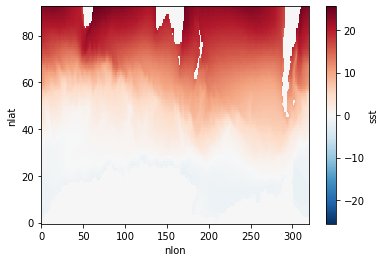

In [3]:
sst_obs_mean = ds_obs.sst.mean('time')
sst_obs_mean.plot()

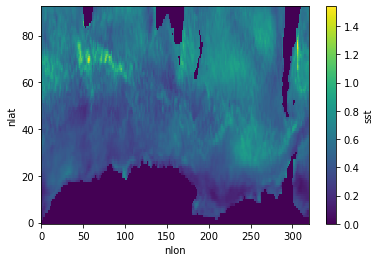

In [4]:
sst_obs_std = ds_obs.sst.std('time')
sst_obs_std.plot()

In [5]:
ds_mod = xr.open_zarr('/glade/p/cgd/oce/projects/krill-cesm-le/data/cesm-le-fields-djf.zarr')
ds_mod

<xarray.Dataset>
Dimensions:        (length: 3, member_id: 34, nlat: 93, nlon: 320, time: 180, z_t: 60, z_t_150m: 15)
Coordinates:
    KMT            (nlat, nlon) float64 dask.array<chunksize=(93, 320), meta=np.ndarray>
    TAREA          (nlat, nlon) float64 dask.array<chunksize=(93, 320), meta=np.ndarray>
    TLAT           (nlat, nlon) float64 dask.array<chunksize=(93, 320), meta=np.ndarray>
    TLONG          (nlat, nlon) float64 dask.array<chunksize=(93, 320), meta=np.ndarray>
    ULAT           (nlat, nlon) float64 dask.array<chunksize=(93, 320), meta=np.ndarray>
    ULONG          (nlat, nlon) float64 dask.array<chunksize=(93, 320), meta=np.ndarray>
    dz             (z_t) float32 dask.array<chunksize=(60,), meta=np.ndarray>
  * length         (length) float64 20.0 40.0 60.0
  * member_id      (member_id) int64 1 2 9 10 11 12 ... 35 101 102 103 104 105
  * time           (time) int64 1921 1922 1923 1924 1925 ... 2097 2098 2099 2100
  * z_t            (z_t) float32 500.0 1500.0 2500.0 ... 512502.8 537500.0
  * z_t_150m       (z_t_150m) float32 500.0 1500.0 2500.0 ... 13500.0 14500.0
Dimensions without coordinates: nlat, nlon
Data variables:
    Chl_surf       (time, member_id, nlat, nlon) float64 dask.array<chunksize=(180, 1, 93, 320), meta=np.ndarray>
    IFRAC          (time, member_id, nlat, nlon) float64 dask.array<chunksize=(180, 1, 93, 320), meta=np.ndarray>
    Jint_100m_DIC  (time, member_id, nlat, nlon) float64 dask.array<chunksize=(180, 1, 93, 320), meta=np.ndarray>
    KGP            (time, length, member_id, nlat, nlon) float64 dask.array<chunksize=(180, 3, 1, 93, 320), meta=np.ndarray>
    NPP            (time, member_id, nlat, nlon) float64 dask.array<chunksize=(180, 1, 93, 320), meta=np.ndarray>
    SST            (time, member_id, nlat, nlon) float64 dask.array<chunksize=(180, 1, 93, 320), meta=np.ndarray>

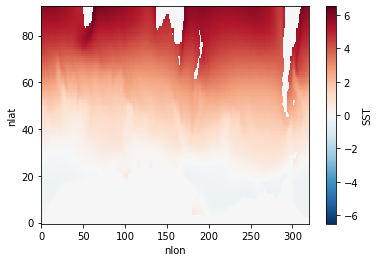

In [6]:
sst_mod_mean = ds_mod.SST.mean(dim=['member_id', 'time'])
sst_mod_mean.plot()

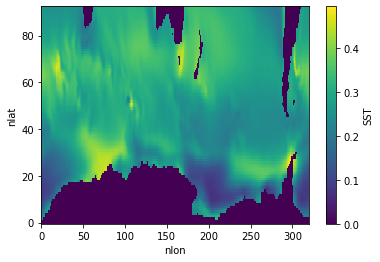

In [7]:
sst_mod_std = ds_mod.SST.std(dim=['member_id', 'time'])
sst_mod_std.plot()

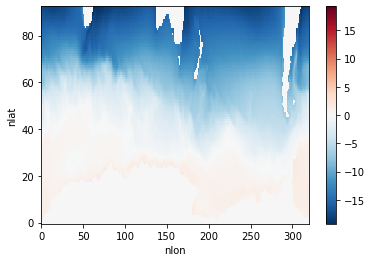

In [8]:
sst_bias = sst_mod_mean - sst_obs_mean
sst_bias.plot()

In [9]:
sst_bias

<xarray.DataArray (nlat: 93, nlon: 320)>
dask.array<sub, shape=(93, 320), dtype=float64, chunksize=(93, 320), chunktype=numpy.ndarray>
Coordinates:
    KMT      (nlat, nlon) float64 dask.array<chunksize=(93, 320), meta=np.ndarray>
    TAREA    (nlat, nlon) float64 dask.array<chunksize=(93, 320), meta=np.ndarray>
    TLAT     (nlat, nlon) float64 dask.array<chunksize=(93, 320), meta=np.ndarray>
    TLONG    (nlat, nlon) float64 dask.array<chunksize=(93, 320), meta=np.ndarray>
    ULAT     (nlat, nlon) float64 dask.array<chunksize=(93, 320), meta=np.ndarray>
    ULONG    (nlat, nlon) float64 dask.array<chunksize=(93, 320), meta=np.ndarray>
Dimensions without coordinates: nlat, nlon

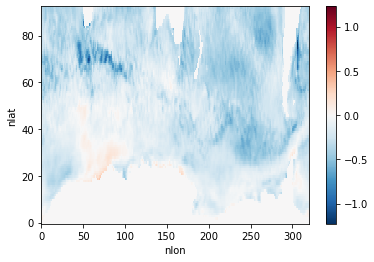

In [10]:
sst_bias_std = sst_mod_std - sst_obs_std
sst_bias_std.plot()

In [11]:
sst_mod_trans = sst_obs_std * (ds_mod.SST - sst_mod_mean) / sst_mod_std + sst_obs_mean
sst_mod_trans

<xarray.DataArray (nlat: 93, nlon: 320, time: 180, member_id: 34)>
dask.array<add, shape=(93, 320, 180, 34), dtype=float64, chunksize=(93, 320, 180, 1), chunktype=numpy.ndarray>
Coordinates:
    KMT        (nlat, nlon) float64 dask.array<chunksize=(93, 320), meta=np.ndarray>
    TAREA      (nlat, nlon) float64 dask.array<chunksize=(93, 320), meta=np.ndarray>
    TLAT       (nlat, nlon) float64 dask.array<chunksize=(93, 320), meta=np.ndarray>
    TLONG      (nlat, nlon) float64 dask.array<chunksize=(93, 320), meta=np.ndarray>
    ULAT       (nlat, nlon) float64 dask.array<chunksize=(93, 320), meta=np.ndarray>
    ULONG      (nlat, nlon) float64 dask.array<chunksize=(93, 320), meta=np.ndarray>
  * member_id  (member_id) int64 1 2 9 10 11 12 13 ... 34 35 101 102 103 104 105
  * time       (time) int64 1921 1922 1923 1924 1925 ... 2097 2098 2099 2100
Dimensions without coordinates: nlat, nlon

/glade/work/zephyrs/miniconda3/envs/krill/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/glade/work/zephyrs/miniconda3/envs/krill/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


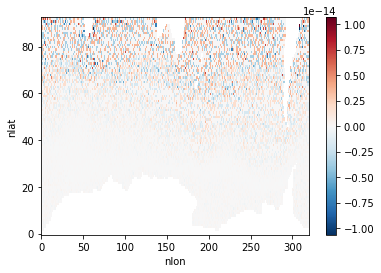

In [12]:
(sst_mod_trans.mean(dim=['member_id', 'time']) - sst_obs_mean).plot()

/glade/work/zephyrs/miniconda3/envs/krill/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/glade/work/zephyrs/miniconda3/envs/krill/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


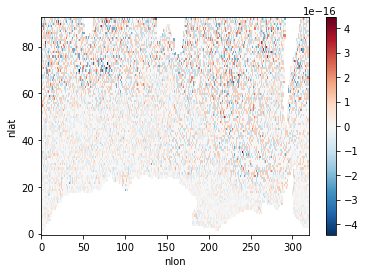

In [13]:
(sst_mod_trans.std(dim=['member_id', 'time']) - sst_obs_std).plot()

___
## Visualize Polar

In [14]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.colors as colors
import cartopy
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
import cmocean
import util

In [44]:
# Plotting Standards:
class MidpointNormalize(colors.Normalize):
    """
    class to help renormalize the color scale
    """
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        # I'm ignoring masked values and all kinds of edge cases to make a simple example...
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

In [16]:
# Lat Lon Source
lon = ds_obs.TLONG.values
lat = ds_obs.TLAT.values

In [17]:
sst_biases = xr.Dataset({'mod_mean': sst_mod_mean, 'mod_std': sst_mod_std,
                        'obs_mean': sst_obs_mean, 'obs_std': sst_obs_std,
                        'mean_bias': sst_bias, 'std_bias': sst_bias_std,
                        'transformed': sst_mod_trans })
sst_biases

<xarray.Dataset>
Dimensions:      (member_id: 34, nlat: 93, nlon: 320, time: 180)
Coordinates:
    KMT          (nlat, nlon) float64 dask.array<chunksize=(93, 320), meta=np.ndarray>
    TAREA        (nlat, nlon) float64 dask.array<chunksize=(93, 320), meta=np.ndarray>
    TLAT         (nlat, nlon) float64 dask.array<chunksize=(93, 320), meta=np.ndarray>
    TLONG        (nlat, nlon) float64 dask.array<chunksize=(93, 320), meta=np.ndarray>
    ULAT         (nlat, nlon) float64 dask.array<chunksize=(93, 320), meta=np.ndarray>
    ULONG        (nlat, nlon) float64 dask.array<chunksize=(93, 320), meta=np.ndarray>
  * member_id    (member_id) int64 1 2 9 10 11 12 13 ... 35 101 102 103 104 105
  * time         (time) int64 1921 1922 1923 1924 1925 ... 2097 2098 2099 2100
Dimensions without coordinates: nlat, nlon
Data variables:
    mod_mean     (nlat, nlon) float64 dask.array<chunksize=(93, 320), meta=np.ndarray>
    mod_std      (nlat, nlon) float64 dask.array<chunksize=(93, 320), meta=np.ndarray>
    obs_mean     (nlat, nlon) float64 dask.array<chunksize=(93, 320), meta=np.ndarray>
    obs_std      (nlat, nlon) float64 dask.array<chunksize=(93, 320), meta=np.ndarray>
    mean_bias    (nlat, nlon) float64 dask.array<chunksize=(93, 320), meta=np.ndarray>
    std_bias     (nlat, nlon) float64 dask.array<chunksize=(93, 320), meta=np.ndarray>
    transformed  (nlat, nlon, time, member_id) float64 dask.array<chunksize=(93, 320, 180, 1), meta=np.ndarray>

In [90]:
# What are you plotting?
to_plot = sst_biases
#array = to_plot.transformed.mean(dim=['member_id', 'time'])
array = to_plot.mean_bias

# Make it Plottable
dsp = util.pop_add_cyclic(
    xr.Dataset({
        'feild': array,
        'TLAT': to_plot.TLAT.compute(),
        'TLONG': to_plot.TLONG.compute()
    } ))

# get more details for levels if needed
level_check = dsp.feild

#print('mean:', level_check.mean().values)
#print('min:', level_check.min().values)
#print('max:', level_check.max().values)

mean: 1.8718682628898826
min: -0.4099160105336558
max: 6.512500461943646


array([-20., -19., -18., -17., -16., -15., -14., -13., -12., -11., -10.,
        -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
         2.])

In [88]:
###########################  levels  -  norm  -  extent  -  projection  ############################    

# Custom Levels 
limYMin = -2
limYMax = 21
levels = np.linspace(limYMin, limYMax, 24)
level_cont = [-1, 5]

levels_bias = np.linspace(-16, 6, 23)

#norm = MidpointNormalize(midpoint=0.)

extent = ([-180, 180, -90, -50], ccrs.PlateCarree()) #[120, 260, 10, 65]

prj = ccrs.SouthPolarStereo()

###############################  Plotting Function:  'One Plot'  ###################################
def one_plot(da, lines=True):
    # filled contours
    cf = ax.contourf(dsp.TLONG,
                     dsp.TLAT,
                     da,
                     levels=levels,
                     #norm=norm,
                     #cmap=cmocean.cm.curl_r,
                     #cmap=cmocean.cm.balance,
                     cmap=cmocean.cm.thermal,
                     #cmap='PuOr_r',
                     #cmap='PRGn',
                     #cmap = 'bone_r',
                     #extend='both',
                     transform=ccrs.PlateCarree())

    # contour lines
    cs = ax.contour(dsp.TLONG,
                    dsp.TLAT,
                    da,
                    colors='k',
                    #levels=levels_bias,
                    levels=level_cont,
                    linewidths=0.5,
                    transform=ccrs.PlateCarree())

    if lines:
        # add contour labels
        lb = plt.clabel(cs, fontsize=8, inline=True, fmt='%r')
    
    # land
    land = ax.add_feature(
        cartopy.feature.NaturalEarthFeature('physical',
                                            'land',
                                            '110m',
                                            facecolor='lightgray'))

    ax.coastlines(linewidth=0.5)

    return cf


Text(0.5, 1.0, 'SST °C')

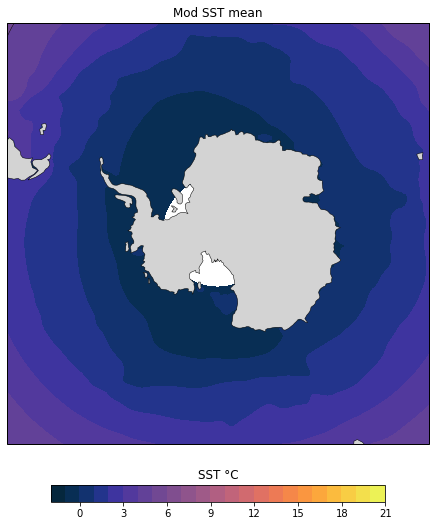

In [89]:
fig = plt.figure(figsize=(12, 10))

axs = []

# plot total
ax = fig.add_subplot(1, 1, 1, projection=prj)
ax.set_extent([-180, 180, -90, -50], ccrs.PlateCarree())
cf = one_plot(dsp.feild)
#ax.set_title('Observational vs Model Bias: mean SST')
#ax.set_title('Transformed Model mean SST')
ax.set_title('Mod SST mean')
#ax.set_title('Obs SST mean')

axs.append(ax)

# colorbar and labels
cb = plt.colorbar(cf, shrink=0.5, orientation='horizontal', pad=0.075, ax=axs)
cb.ax.set_title('SST °C')
#cb.ax.set_title('$\Delta$ SST °C')
#cb.ax.set_title('$\Delta$ STD of SST')

In [108]:
np.linspace(-15.5, 2, 36)

array([-15.5, -15. , -14.5, -14. , -13.5, -13. , -12.5, -12. , -11.5,
       -11. , -10.5, -10. ,  -9.5,  -9. ,  -8.5,  -8. ,  -7.5,  -7. ,
        -6.5,  -6. ,  -5.5,  -5. ,  -4.5,  -4. ,  -3.5,  -3. ,  -2.5,
        -2. ,  -1.5,  -1. ,  -0.5,   0. ,   0.5,   1. ,   1.5,   2. ])

In [109]:
###########################  levels  -  norm  -  extent  -  projection  ############################    

# Custom Levels 
limYMin = -2
limYMax = 21
levels = np.linspace(limYMin, limYMax, 24)
level_cont = [-1, 5]

levels_bias = np.linspace(-15.5, 2, 36)

norm = MidpointNormalize(midpoint=0.)

extent = ([-180, 180, -90, -50], ccrs.PlateCarree()) #[120, 260, 10, 65]

prj = ccrs.SouthPolarStereo()

###############################  Plotting Function:  'One Plot'  ###################################
def one_plot(da, lines=True):
    # filled contours
    cf = ax.contourf(dsp.TLONG,
                     dsp.TLAT,
                     da,
                     levels=levels_bias,
                     norm=norm,
                     #cmap=cmocean.cm.curl_r,
                     cmap=cmocean.cm.balance,
                     #cmap=cmocean.cm.thermal,
                     #cmap='PuOr_r',
                     #cmap='PRGn',
                     #cmap = 'bone_r',
                     #extend='both',
                     transform=ccrs.PlateCarree())

    # contour lines
    cs = ax.contour(dsp.TLONG,
                    dsp.TLAT,
                    da,
                    colors='k',
                    levels=levels_bias,
                    #levels=level_cont,
                    linewidths=0.5,
                    transform=ccrs.PlateCarree())

    if lines:
        # add contour labels
        lb = plt.clabel(cs, fontsize=8, inline=True, fmt='%r')
    
    # land
    land = ax.add_feature(
        cartopy.feature.NaturalEarthFeature('physical',
                                            'land',
                                            '110m',
                                            facecolor='lightgray'))

    ax.coastlines(linewidth=0.5)

    return cf


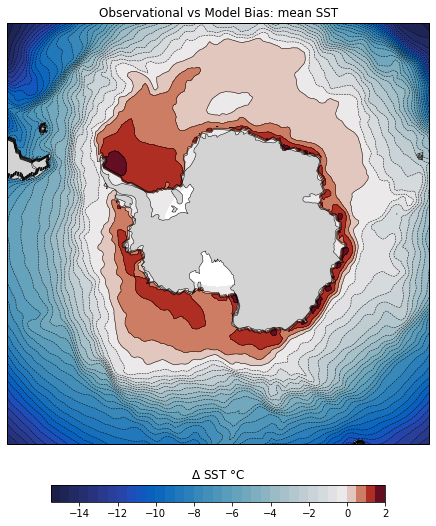

In [110]:
#BIAS
fig = plt.figure(figsize=(12, 10))

axs = []

# plot total
ax = fig.add_subplot(1, 1, 1, projection=prj)
ax.set_extent([-180, 180, -90, -50], ccrs.PlateCarree())
cf = one_plot(dsp.feild, lines = False)
ax.set_title('Observational vs Model Bias: mean SST')
#ax.set_title('Transformed Model mean SST')
#ax.set_title('Mod SST mean')
#ax.set_title('Obs SST mean')

axs.append(ax)

# colorbar and labels
cb = plt.colorbar(cf, shrink=0.5, orientation='horizontal', pad=0.075, ax=axs)
#cb.ax.set_title('SST °C')
cb.ax.set_title('$\Delta$ SST °C');
#cb.ax.set_title('$\Delta$ STD of SST')

## Krilllll

In [23]:
sst_mod_trans

<xarray.DataArray (nlat: 93, nlon: 320, time: 180, member_id: 34)>
dask.array<add, shape=(93, 320, 180, 34), dtype=float64, chunksize=(93, 320, 180, 1), chunktype=numpy.ndarray>
Coordinates:
    KMT        (nlat, nlon) float64 dask.array<chunksize=(93, 320), meta=np.ndarray>
    TAREA      (nlat, nlon) float64 dask.array<chunksize=(93, 320), meta=np.ndarray>
    TLAT       (nlat, nlon) float64 dask.array<chunksize=(93, 320), meta=np.ndarray>
    TLONG      (nlat, nlon) float64 dask.array<chunksize=(93, 320), meta=np.ndarray>
    ULAT       (nlat, nlon) float64 dask.array<chunksize=(93, 320), meta=np.ndarray>
    ULONG      (nlat, nlon) float64 dask.array<chunksize=(93, 320), meta=np.ndarray>
  * member_id  (member_id) int64 1 2 9 10 11 12 13 ... 34 35 101 102 103 104 105
  * time       (time) int64 1921 1922 1923 1924 1925 ... 2097 2098 2099 2100
Dimensions without coordinates: nlat, nlon

In [24]:
ds_mod

<xarray.Dataset>
Dimensions:        (length: 3, member_id: 34, nlat: 93, nlon: 320, time: 180, z_t: 60, z_t_150m: 15)
Coordinates:
    KMT            (nlat, nlon) float64 dask.array<chunksize=(93, 320), meta=np.ndarray>
    TAREA          (nlat, nlon) float64 dask.array<chunksize=(93, 320), meta=np.ndarray>
    TLAT           (nlat, nlon) float64 dask.array<chunksize=(93, 320), meta=np.ndarray>
    TLONG          (nlat, nlon) float64 dask.array<chunksize=(93, 320), meta=np.ndarray>
    ULAT           (nlat, nlon) float64 dask.array<chunksize=(93, 320), meta=np.ndarray>
    ULONG          (nlat, nlon) float64 dask.array<chunksize=(93, 320), meta=np.ndarray>
    dz             (z_t) float32 dask.array<chunksize=(60,), meta=np.ndarray>
  * length         (length) float64 20.0 40.0 60.0
  * member_id      (member_id) int64 1 2 9 10 11 12 ... 35 101 102 103 104 105
  * time           (time) int64 1921 1922 1923 1924 1925 ... 2097 2098 2099 2100
  * z_t            (z_t) float32 500.0 1500.0 2500.0 ... 512502.8 537500.0
  * z_t_150m       (z_t_150m) float32 500.0 1500.0 2500.0 ... 13500.0 14500.0
Dimensions without coordinates: nlat, nlon
Data variables:
    Chl_surf       (time, member_id, nlat, nlon) float64 dask.array<chunksize=(180, 1, 93, 320), meta=np.ndarray>
    IFRAC          (time, member_id, nlat, nlon) float64 dask.array<chunksize=(180, 1, 93, 320), meta=np.ndarray>
    Jint_100m_DIC  (time, member_id, nlat, nlon) float64 dask.array<chunksize=(180, 1, 93, 320), meta=np.ndarray>
    KGP            (time, length, member_id, nlat, nlon) float64 dask.array<chunksize=(180, 3, 1, 93, 320), meta=np.ndarray>
    NPP            (time, member_id, nlat, nlon) float64 dask.array<chunksize=(180, 1, 93, 320), meta=np.ndarray>
    SST            (time, member_id, nlat, nlon) float64 dask.array<chunksize=(180, 1, 93, 320), meta=np.ndarray>

In [ ]:
#rename to match simulation convention
ds_obs['Chl_surf'] = ds_obs['chl_gsm']

#select specific variables to include in sliced dataset
grid_vars = ['KMT', 'TAREA', 'TLAT', 'TLONG', 'time']
data_vars = ['Chl_surf']

ds_obs = ds_obs[data_vars+grid_vars].isel(nlat=slice(0, 93))
ds_obs

In [ ]:
model_sst_transform = xr.Dataset({'transformed_sst': sst_mod_trans,
                                 ds_mod}})
model_sst_transform

In [29]:
ds_mod['SST'] =  sst_mod_trans
ds_mod

<xarray.Dataset>
Dimensions:        (length: 3, member_id: 34, nlat: 93, nlon: 320, time: 180, z_t: 60, z_t_150m: 15)
Coordinates:
    KMT            (nlat, nlon) float64 dask.array<chunksize=(93, 320), meta=np.ndarray>
    TAREA          (nlat, nlon) float64 dask.array<chunksize=(93, 320), meta=np.ndarray>
    TLAT           (nlat, nlon) float64 dask.array<chunksize=(93, 320), meta=np.ndarray>
    TLONG          (nlat, nlon) float64 dask.array<chunksize=(93, 320), meta=np.ndarray>
    ULAT           (nlat, nlon) float64 dask.array<chunksize=(93, 320), meta=np.ndarray>
    ULONG          (nlat, nlon) float64 dask.array<chunksize=(93, 320), meta=np.ndarray>
    dz             (z_t) float32 dask.array<chunksize=(60,), meta=np.ndarray>
  * length         (length) float64 20.0 40.0 60.0
  * member_id      (member_id) int64 1 2 9 10 11 12 ... 35 101 102 103 104 105
  * time           (time) int64 1921 1922 1923 1924 1925 ... 2097 2098 2099 2100
  * z_t            (z_t) float32 500.0 1500.0 2500.0 ... 512502.8 537500.0
  * z_t_150m       (z_t_150m) float32 500.0 1500.0 2500.0 ... 13500.0 14500.0
Dimensions without coordinates: nlat, nlon
Data variables:
    Chl_surf       (time, member_id, nlat, nlon) float64 dask.array<chunksize=(180, 1, 93, 320), meta=np.ndarray>
    IFRAC          (time, member_id, nlat, nlon) float64 dask.array<chunksize=(180, 1, 93, 320), meta=np.ndarray>
    Jint_100m_DIC  (time, member_id, nlat, nlon) float64 dask.array<chunksize=(180, 1, 93, 320), meta=np.ndarray>
    KGP            (time, length, member_id, nlat, nlon) float64 dask.array<chunksize=(180, 3, 1, 93, 320), meta=np.ndarray>
    NPP            (time, member_id, nlat, nlon) float64 dask.array<chunksize=(180, 1, 93, 320), meta=np.ndarray>
    SST            (nlat, nlon, time, member_id) float64 dask.array<chunksize=(93, 320, 180, 1), meta=np.ndarray>
    SST_trans      (nlat, nlon, time, member_id) float64 dask.array<chunksize=(93, 320, 180, 1), meta=np.ndarray>

In [ ]:
ds_mod['GP_SST_trans'] =  sst_mod_trans


In [32]:
ds_test = util.compute_kgp(ds_mod, ds_mod.length)
ds_test

<xarray.Dataset>
Dimensions:        (length: 3, member_id: 34, nlat: 93, nlon: 320, time: 180, z_t: 60, z_t_150m: 15)
Coordinates:
    KMT            (nlat, nlon) float64 dask.array<chunksize=(93, 320), meta=np.ndarray>
    TAREA          (nlat, nlon) float64 dask.array<chunksize=(93, 320), meta=np.ndarray>
    TLAT           (nlat, nlon) float64 dask.array<chunksize=(93, 320), meta=np.ndarray>
    TLONG          (nlat, nlon) float64 dask.array<chunksize=(93, 320), meta=np.ndarray>
    ULAT           (nlat, nlon) float64 dask.array<chunksize=(93, 320), meta=np.ndarray>
    ULONG          (nlat, nlon) float64 dask.array<chunksize=(93, 320), meta=np.ndarray>
    dz             (z_t) float32 dask.array<chunksize=(60,), meta=np.ndarray>
  * length         (length) float64 20.0 40.0 60.0
  * member_id      (member_id) int64 1 2 9 10 11 12 ... 35 101 102 103 104 105
  * time           (time) int64 1921 1922 1923 1924 1925 ... 2097 2098 2099 2100
  * z_t            (z_t) float32 500.0 1500.0 2500.0 ... 512502.8 537500.0
  * z_t_150m       (z_t_150m) float32 500.0 1500.0 2500.0 ... 13500.0 14500.0
Dimensions without coordinates: nlat, nlon
Data variables:
    Chl_surf       (time, member_id, nlat, nlon) float64 dask.array<chunksize=(180, 1, 93, 320), meta=np.ndarray>
    IFRAC          (time, member_id, nlat, nlon) float64 dask.array<chunksize=(180, 1, 93, 320), meta=np.ndarray>
    Jint_100m_DIC  (time, member_id, nlat, nlon) float64 dask.array<chunksize=(180, 1, 93, 320), meta=np.ndarray>
    KGP            (length, time, member_id, nlat, nlon) float64 dask.array<chunksize=(3, 180, 1, 93, 320), meta=np.ndarray>
    NPP            (time, member_id, nlat, nlon) float64 dask.array<chunksize=(180, 1, 93, 320), meta=np.ndarray>
    SST            (nlat, nlon, time, member_id) float64 dask.array<chunksize=(93, 320, 180, 1), meta=np.ndarray>
    SST_trans      (nlat, nlon, time, member_id) float64 dask.array<chunksize=(93, 320, 180, 1), meta=np.ndarray>

In [33]:
# What are you plotting?
to_plot = ds_test
array = to_plot.KGP.mean(dim=['member_id', 'time'])

# Make it Plottable
dsp = util.pop_add_cyclic(
    xr.Dataset({
        'feild': array,
        'TLAT': to_plot.TLAT.compute(),
        'TLONG': to_plot.TLONG.compute()
    } ))

# get more details for levels if needed
level_check = dsp.feild

print('mean:', level_check.mean().values)
print('min:', level_check.min().values)
print('max:', level_check.max().values)

/glade/work/zephyrs/miniconda3/envs/krill/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/glade/work/zephyrs/miniconda3/envs/krill/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in less_equal
  return func(*(_execute_task(a, cache) for a in args))
/glade/work/zephyrs/miniconda3/envs/krill/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in greater_equal
  return func(*(_execute_task(a, cache) for a in args))
/glade/work/zephyrs/miniconda3/envs/krill/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


mean: -0.011339662603570225


/glade/work/zephyrs/miniconda3/envs/krill/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/glade/work/zephyrs/miniconda3/envs/krill/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in less_equal
  return func(*(_execute_task(a, cache) for a in args))
/glade/work/zephyrs/miniconda3/envs/krill/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in greater_equal
  return func(*(_execute_task(a, cache) for a in args))


KeyboardInterrupt: 